### Preperation of Top Grossing, Top Paid, Top Free datasets of both platforms

In [1]:
import os.path
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read in the datasets
applestore_free = pd.read_json("datasets/applestore_free_1.json")
applestore_grossing_1 = pd.read_json("datasets/applestore_grossing_1.json")
applestore_grossing_2 = pd.read_json("datasets/applestore_grossing_2.json")
applestore_paid_1 = pd.read_json("datasets/applestore_paid_1.json")
applestore_paid_2 = pd.read_json("datasets/applestore_paid_2.json")
googlestore_all_charts = pd.read_json("datasets/googleplay_all_charts.json")

# APPLE

### Apple Store Grossing

In [3]:
# Handy thing to clean rating of apple apps
clean_apple_app_rating = lambda x: str(x).split()[0].strip(',')

In [4]:
applestore_grossing = pd.concat([applestore_grossing_1, applestore_grossing_2]) # Concat dataframes
applestore_grossing = applestore_grossing.reset_index(drop=True) # Reset the index when concating 2 dataframes
applestore_grossing['rating_clean'] = applestore_grossing['star'].apply(clean_apple_app_rating)
#applestore_grossing

apple_grossing = applestore_grossing[['title', 'rating_clean']].copy()
apple_grossing['rating_clean'] = apple_grossing['rating_clean'].astype(float)
apple_grossing.rename(columns={'title':'apple_app','rating_clean':'apple_ratings'}, inplace=True)
#apple_grossing.dtypes
#apple_grossing.head(2)

### Apple Store Paid

In [5]:
applestore_paid = pd.concat([applestore_paid_1, applestore_paid_2]) # Concat dataframes
applestore_paid = applestore_paid.reset_index(drop=True) # Reset the index when concating 2 dataframes
applestore_paid['rating_clean'] = applestore_paid['star'].apply(clean_apple_app_rating)
#applestore_paid

apple_paid = applestore_paid[['title', 'rating_clean']].copy()
apple_paid['rating_clean'] = apple_paid['rating_clean'].astype(float)
apple_paid.rename(columns={'title':'apple_app','rating_clean':'apple_ratings'}, inplace=True)
#apple_paid.dtypes
#apple_paid.tail(2)

### Apple Store Free

In [6]:
applestore_free['rating_clean'] = applestore_free['star'].apply(clean_apple_app_rating)
#applestore_free

apple_free = applestore_free[['title', 'rating_clean']].copy()
apple_free['rating_clean'] = apple_free['rating_clean'].astype(float)
apple_free.rename(columns={'title':'apple_app','rating_clean':'apple_ratings'}, inplace=True)
#apple_free.dtypes
#apple_free.tail()

#### We've 3 Apple datasets: applestore_grossing, applestore_paid, applestore_free. Since the Google Play charts are all together, we'll have to do several groupby statements to organise the dataframes.

# GOOGLE

In [7]:
# These are the unique types of charts in the Google Play dataset
googlestore_all_charts['table_title'].unique()

array(['Top New Apps', 'Top Selling New Apps', 'Top New Games',
       'Top Selling New Games', 'Top Apps', 'Top Selling Games',
       'Top Games', 'Top Grossing Games', 'Top Grossing Apps',
       'Top Selling Apps'], dtype=object)

In [8]:
# This is our handy clean_google_app_title which isolates the string of app title
# (returns the 2nd component and everything after it using[1:])
clean_google_app_title = lambda x: ' '.join(x.split()[1:])

#Returns 2nd component of rating
clean_google_app_rating = lambda x: str(x).split()[1]

### Google Store Grossing

In [9]:
googlestore_grossing = googlestore_all_charts.groupby(['table_title']).get_group("Top Grossing Apps")
googlestore_grossing['title_clean'] = googlestore_grossing['title'].apply(clean_google_app_title)
googlestore_grossing['rating_clean'] = googlestore_grossing['star_rates'].apply(clean_google_app_rating)
googlestore_grossing = googlestore_grossing.reset_index(drop=True) # Reset the index
#googlestore_grossing

google_grossing = googlestore_grossing[['title_clean', 'rating_clean']].copy()
google_grossing['rating_clean'] = google_grossing['rating_clean'].astype(float)
google_grossing.rename(columns={'title_clean':'google_app','rating_clean':'google_ratings'}, inplace=True)
#google_grossing.dtypes
#google_grossing.head()

### Google Store Paid

In [10]:
googlestore_paid = googlestore_all_charts.groupby(['table_title']).get_group("Top Selling Apps")
googlestore_paid['title_clean'] = googlestore_paid['title'].apply(clean_google_app_title)
googlestore_paid['rating_clean'] = googlestore_paid['star_rates'].apply(clean_google_app_rating)
googlestore_paid = googlestore_paid.reset_index(drop=True) # Reset the index
#googlestore_paid

google_paid = googlestore_paid[['title_clean', 'rating_clean']].copy()
google_paid['rating_clean'] = google_paid['rating_clean'].astype(float)
google_paid.rename(columns={'title_clean':'google_app','rating_clean':'google_ratings'}, inplace=True)
#google_paid.dtypes
#google_paid.tail()

### Google Store Free
##### The 'Top Apps' chart in Google Play contains the free apps.

In [11]:
googlestore_free = googlestore_all_charts.groupby(['table_title']).get_group("Top Apps")
googlestore_free['title_clean'] = googlestore_free['title'].apply(clean_google_app_title)
googlestore_free['rating_clean'] = googlestore_free['star_rates'].apply(clean_google_app_rating)
googlestore_free = googlestore_free.reset_index(drop=True) # Reset the index
#googlestore_free

google_free = googlestore_free[['title_clean', 'rating_clean']].copy()
google_free['rating_clean'] = google_free['rating_clean'].astype(float)
google_free.rename(columns={'title_clean':'google_app','rating_clean':'google_ratings'}, inplace=True)
#google_free.dtypes
#google_free.tail()

#### I am going to create dataframes of apps that are common between the same charts of respective platforms.

## PLOTS

### Grossing Chart Plots

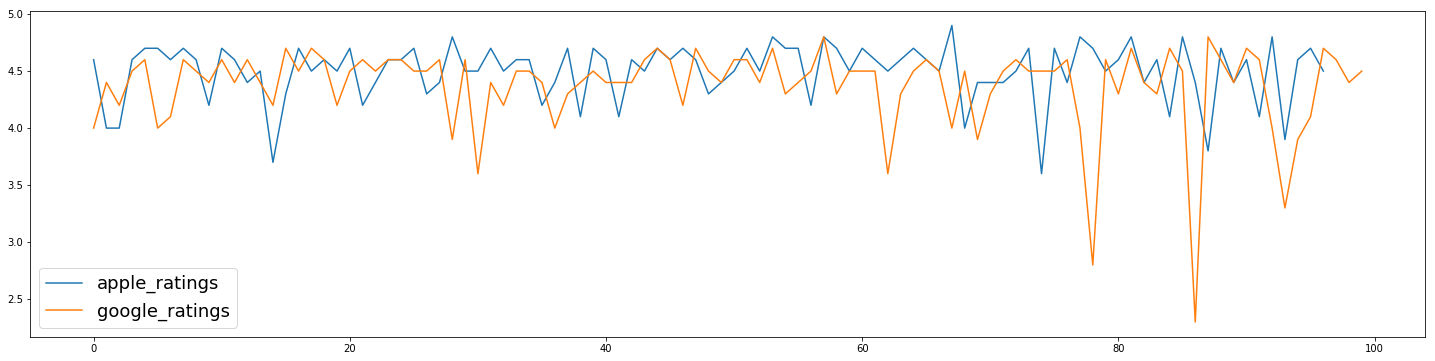

In [12]:
ax = apple_grossing.plot(figsize=(25, 6), kind='line')
google_grossing.plot(ax = ax);

ax.legend(fontsize = 18, loc = 'best');

#### Shared Apps on Grossing Charts

In [13]:
common_grossing_apps = google_grossing.merge(apple_grossing, left_on='google_app', right_on='apple_app')
common_grossing_apps = common_grossing_apps.drop(['apple_app'], axis = 1)
common_grossing_apps.rename(columns={'google_app':'title'}, inplace=True);

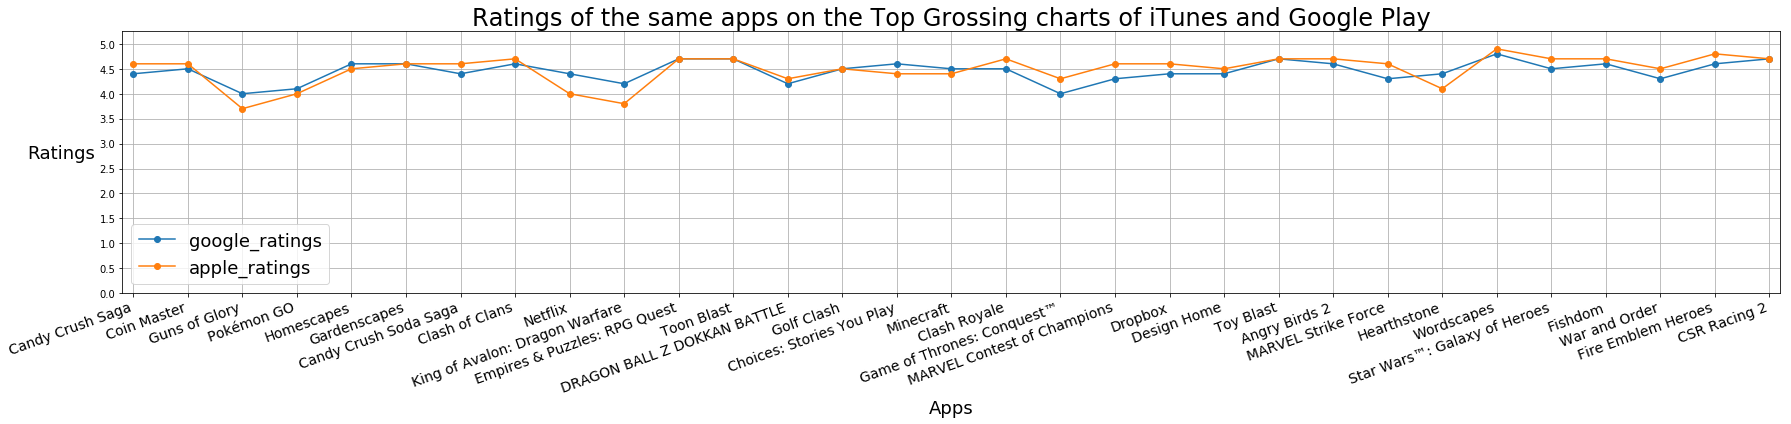

In [14]:
ax = common_grossing_apps.plot(figsize=(25, 6), marker='o', kind='line')
ax.legend(fontsize = 18, loc = 'lower left')
ax.set_xticklabels(common_grossing_apps['title'], fontsize = 14, rotation = 20, ha = 'right')
ax.grid(which='major', axis='both')

plt.title('Ratings of the same apps on the Top Grossing charts of iTunes and Google Play', fontsize = 24)
plt.xticks(np.arange(0, len(common_grossing_apps.title), step=1))
plt.xlim(-0.2, len(common_grossing_apps.title)-0.8) # Length of x axis components -1 then +0.2
plt.yticks(np.arange(0, 5.5, step=0.5))
plt.ylim(0,5.25)

plt.xlabel('Apps', fontsize = 18)
ratinglabel = plt.ylabel('Ratings', fontsize = 18, ha = 'right')
ratinglabel.set_rotation(0);
plt.tight_layout()
plt.savefig('Topgrossingratings.pdf');

### Paid Chart Plots

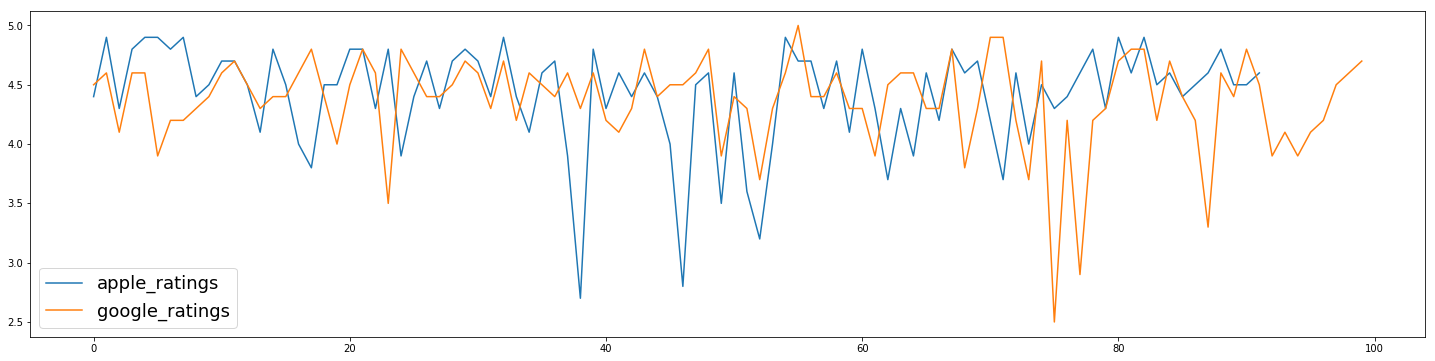

In [15]:
ax = apple_paid.plot(figsize=(25, 6), kind='line')
google_paid.plot(ax = ax);

ax.legend(fontsize = 18, loc = 'best');

#### Shared Apps on Paid Charts

In [16]:
common_paid_apps = google_paid.merge(apple_paid, left_on='google_app', right_on='apple_app')
common_paid_apps = common_paid_apps.drop(['apple_app'], axis = 1)
common_paid_apps.rename(columns={'google_app':'title'}, inplace=True);

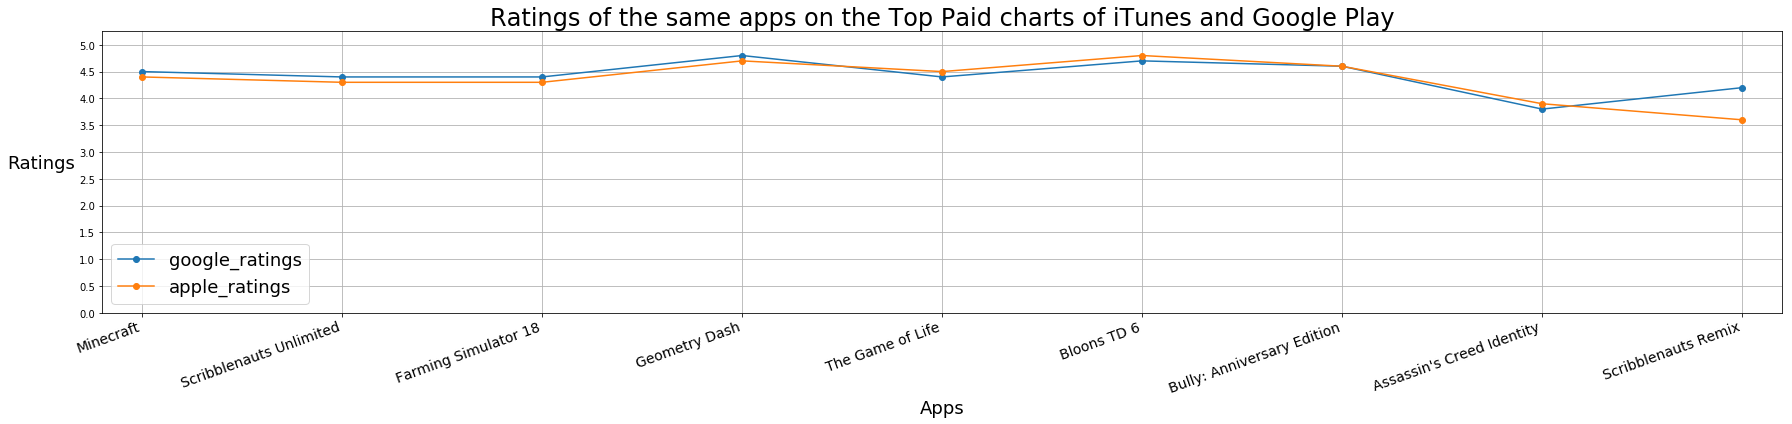

In [17]:
ax = common_paid_apps.plot(figsize=(25, 6), marker='o', kind='line')
ax.legend(fontsize = 18, loc = 'lower left')
ax.set_xticklabels(common_paid_apps['title'], fontsize = 14, rotation = 20, ha = 'right')
ax.grid(which='major', axis='both')

plt.title('Ratings of the same apps on the Top Paid charts of iTunes and Google Play', fontsize = 24)
plt.xticks(np.arange(0, len(common_paid_apps.title), step=1))
plt.xlim(-0.2, len(common_paid_apps.title)-0.8) # Length of x axis components -1 then +0.2
plt.yticks(np.arange(0, 5.5, step=0.5))
plt.ylim(0,5.25)

plt.xlabel('Apps', fontsize = 18)
ratinglabel = plt.ylabel('Ratings', fontsize = 18, ha = 'right')
ratinglabel.set_rotation(0);
plt.tight_layout()
plt.savefig('Toppaidratings.pdf');

### Free Chart Plots

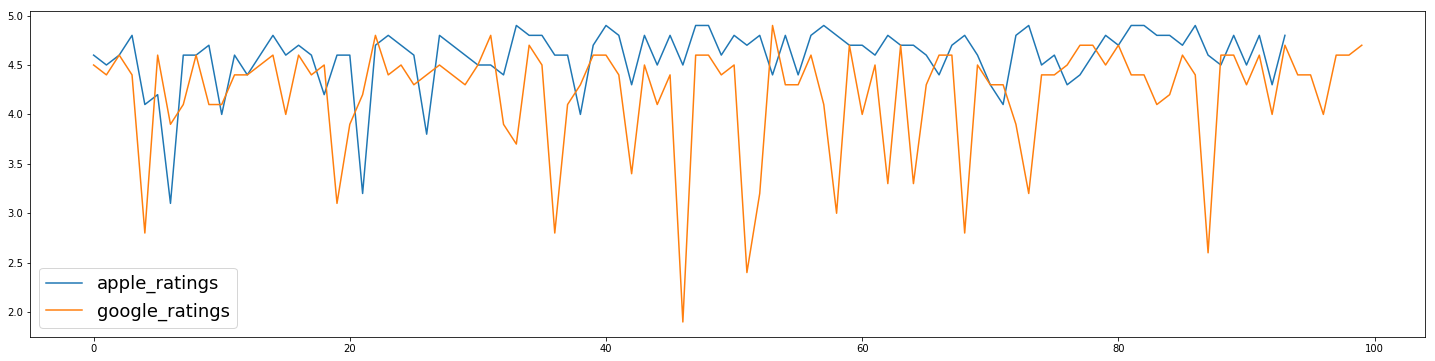

In [18]:
ax = apple_free.plot(figsize=(25, 6), kind='line')
google_free.plot(ax = ax);

ax.legend(fontsize = 18, loc = 'best');

#### Shared Apps on Free Charts

In [19]:
common_free_apps = google_free.merge(apple_free, left_on='google_app', right_on='apple_app')
common_free_apps = common_free_apps.drop(['apple_app'], axis = 1)
common_free_apps.rename(columns={'google_app':'title'}, inplace=True);

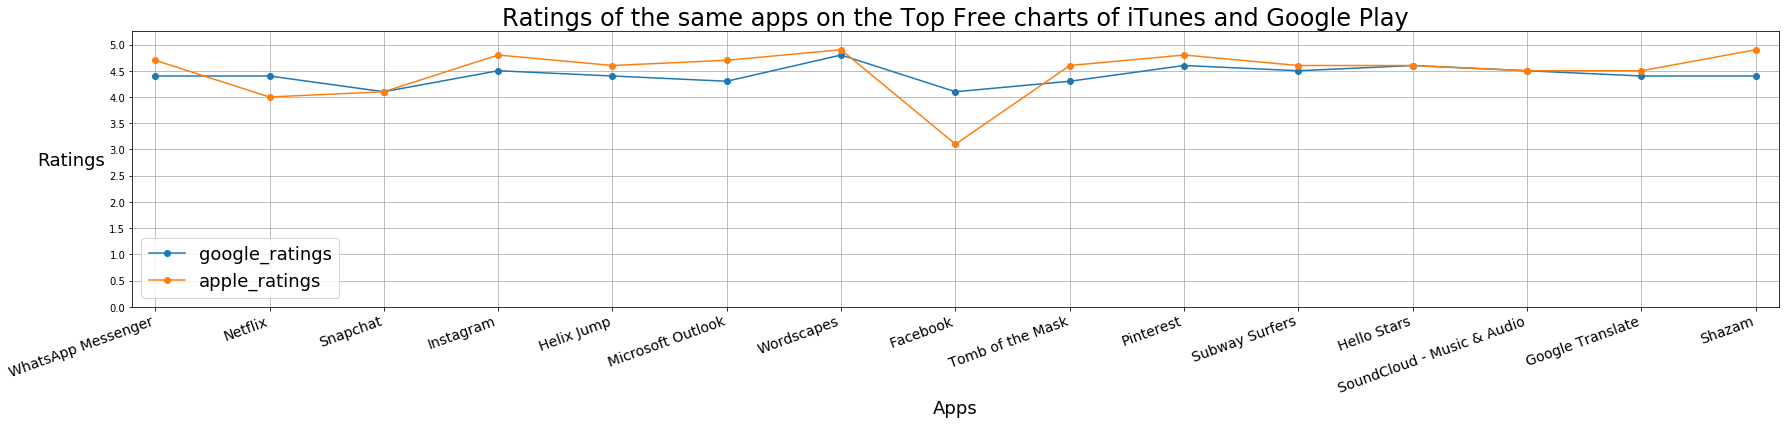

In [20]:
ax = common_free_apps.plot(figsize=(25, 6), marker='o', kind='line')
ax.legend(fontsize = 18, loc = 'lower left')
ax.set_xticklabels(common_free_apps['title'], fontsize = 14, rotation = 20, ha = 'right')
ax.grid(which='major', axis='both')

plt.title('Ratings of the same apps on the Top Free charts of iTunes and Google Play', fontsize = 24)
plt.xticks(np.arange(0, len(common_free_apps.title), step=1))
plt.xlim(-0.2, len(common_free_apps.title)-0.8) # Length of x axis components -1 then +0.2
plt.yticks(np.arange(0, 5.5, step=0.5))
plt.ylim(0,5.25)

plt.xlabel('Apps', fontsize = 18)
ratinglabel = plt.ylabel('Ratings', fontsize = 18, ha = 'right')
ratinglabel.set_rotation(0);
plt.tight_layout()
plt.savefig('Topfreeratings.pdf');

### USEFUL STUFF FOR LATER

In [21]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

#display_side_by_side(google_paid,apple_paid)

In [22]:
#List of common apps
list_of_common_paid_apps = list(set(apple_paid.apple_app).intersection(set(google_paid.google_app)))

#Show it
#list_of_common_paid_apps